<a href="https://colab.research.google.com/github/Chetan2414/PaisaBazaar-Customer-Credit-Behavior-Analysis/blob/main/PaisaBazaar_EDA_ML_Final_Updated_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PaisaBazaar Customer Credit Behavior Analysis
This project explores customer financial behavior from PaisaBazaar's real-world dataset, with the goal of predicting credit score categories based on financial and behavioral features.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load Dataset

In [5]:
from google.colab import files
uploaded = files.upload()

Saving dataset-2.csv to dataset-2 (1).csv


In [6]:
df = pd.read_csv('dataset-2.csv')
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


## Dataset Overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [8]:
df.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,...,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,NaN,NaN,NaN,10128,NaN,NaN,15,NaN,NaN,NaN,...,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,Jessicad,NaN,NaN,Lawyer,NaN,NaN,NaN,...,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,48,NaN,NaN,7096,NaN,NaN,NaN,...,45848,NaN,NaN,NaN,52326,NaN,NaN,28616,NaN,53174
mean,80631.500000,25982.666640,4.500000,NaN,33.316340,5.004617e+08,NaN,50505.123449,4197.270835,5.368820,...,NaN,1426.220376,32.285173,221.220460,NaN,107.699208,55.101315,NaN,392.697586,NaN
std,43301.486619,14340.543051,2.291299,NaN,10.764812,2.908267e+08,NaN,38299.422093,3186.432497,2.593314,...,NaN,1155.129026,5.116875,99.680716,NaN,132.267056,39.006932,NaN,201.652719,NaN
min,5634.000000,1006.000000,1.000000,NaN,14.000000,8.134900e+04,NaN,7005.930000,303.645417,0.000000,...,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,43132.750000,13664.500000,2.750000,NaN,24.000000,2.451686e+08,NaN,19342.972500,1626.594167,3.000000,...,NaN,566.072500,28.052567,144.000000,NaN,29.268886,27.959111,NaN,267.615983,NaN
50%,80631.500000,25777.000000,4.500000,NaN,33.000000,5.006886e+08,NaN,36999.705000,3095.905000,5.000000,...,NaN,1166.155000,32.305784,219.000000,NaN,66.462304,45.156550,NaN,333.865366,NaN
75%,118130.250000,38385.000000,6.250000,NaN,42.000000,7.560027e+08,NaN,71683.470000,5957.715000,7.000000,...,NaN,1945.962500,36.496663,302.000000,NaN,147.392573,71.295797,NaN,463.215683,NaN


## Data Cleaning

In [9]:
df.drop(['ID', 'Customer_ID', 'SSN', 'Name'], axis=1, inplace=True)
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()

In [10]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


## Correlation Heatmap

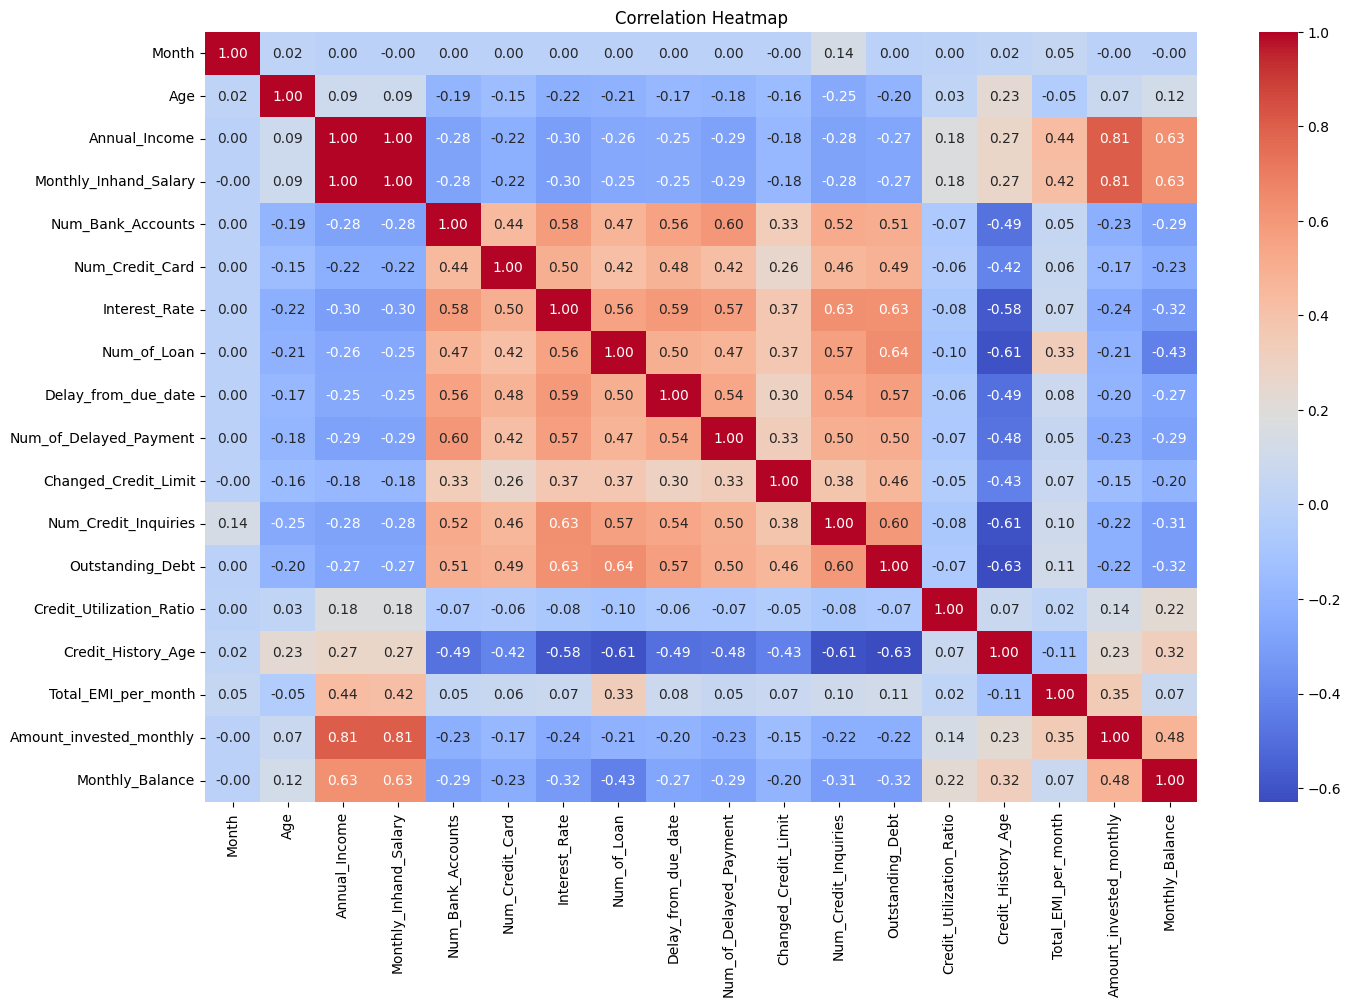

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(16, 10))
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Univariate Analysis

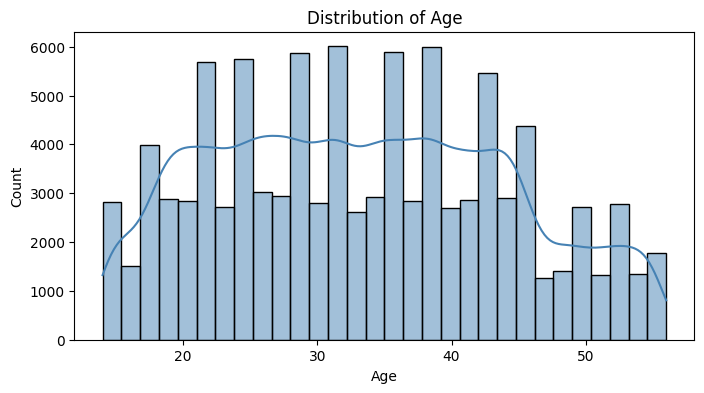

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Age')
plt.show()

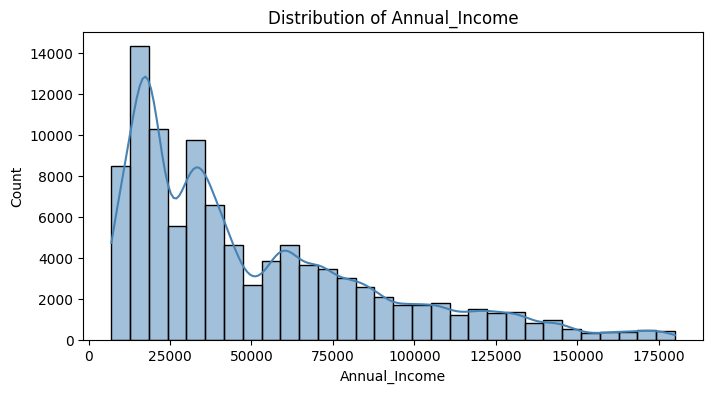

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['Annual_Income'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Annual_Income')
plt.show()

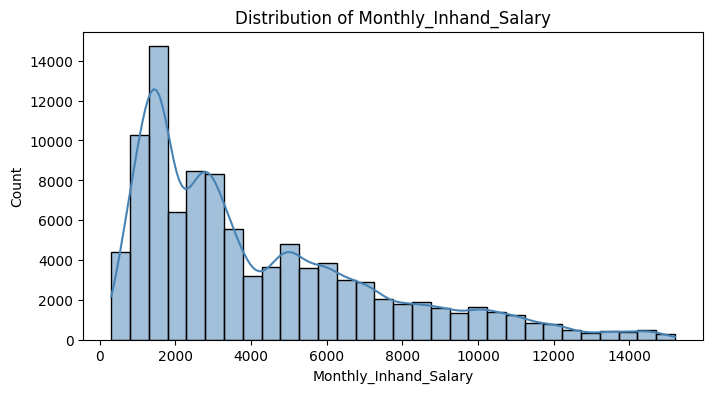

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df['Monthly_Inhand_Salary'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Monthly_Inhand_Salary')
plt.show()

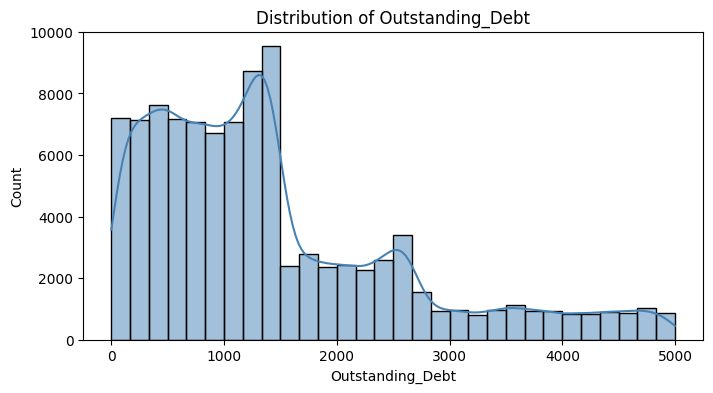

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['Outstanding_Debt'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Outstanding_Debt')
plt.show()

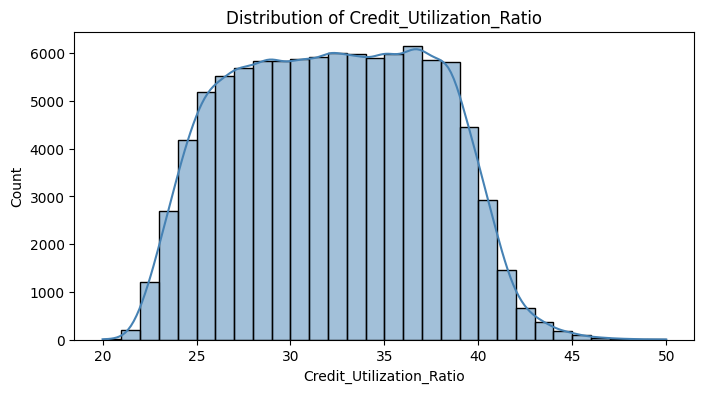

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(df['Credit_Utilization_Ratio'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Credit_Utilization_Ratio')
plt.show()

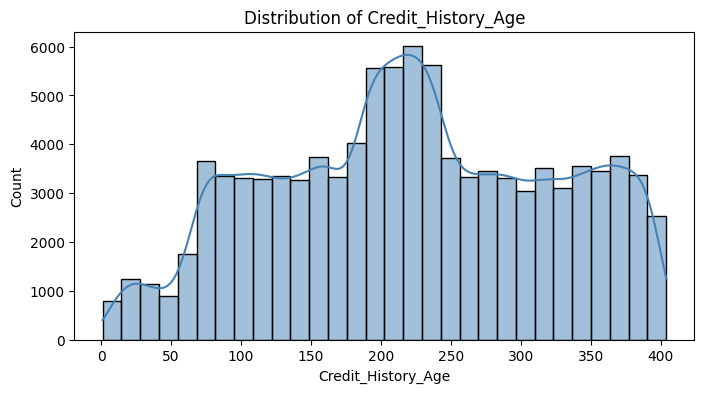

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df['Credit_History_Age'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Credit_History_Age')
plt.show()

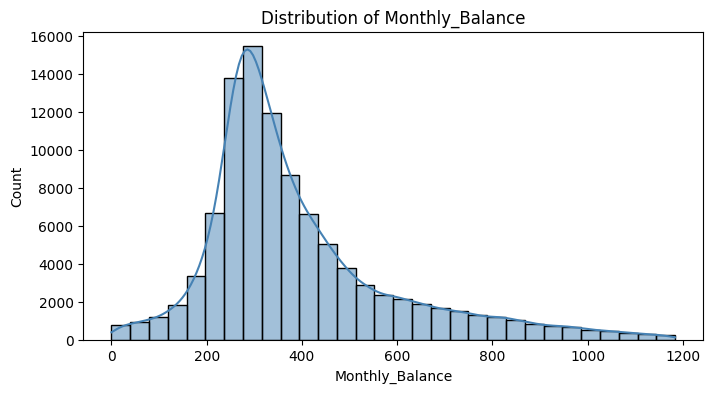

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(df['Monthly_Balance'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Monthly_Balance')
plt.show()

## Bivariate Analysis

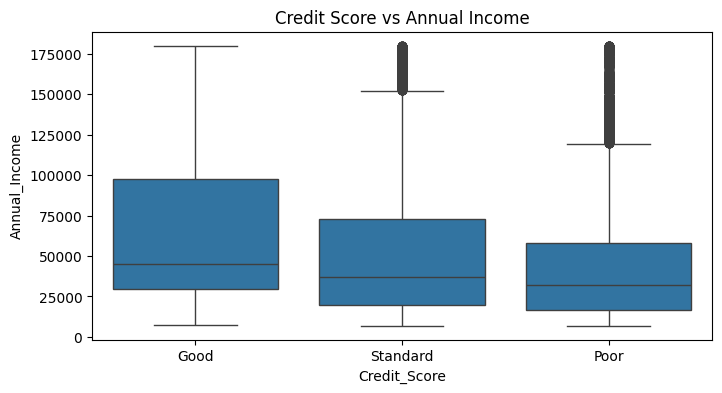

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df)
plt.title('Credit Score vs Annual Income')
plt.show()

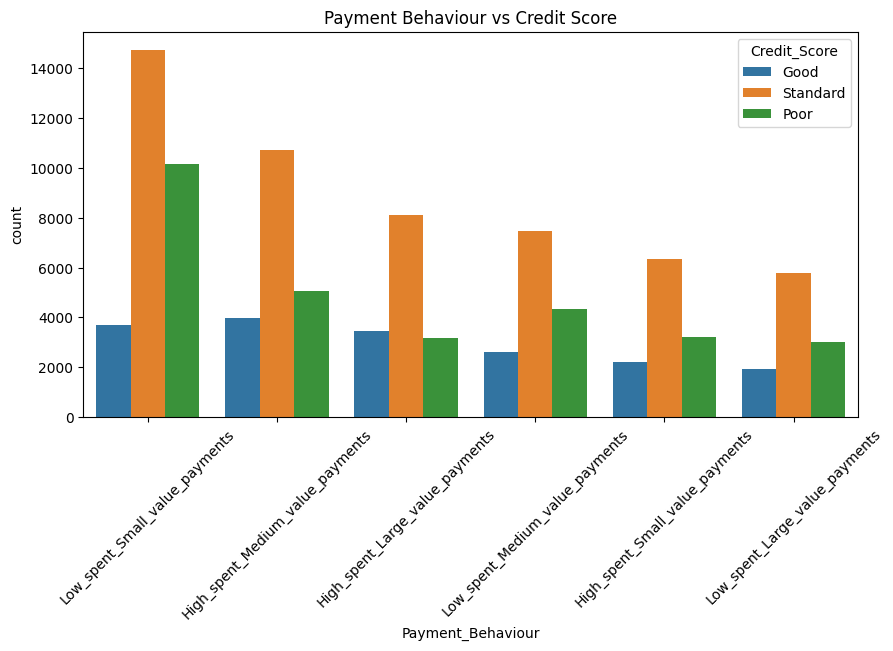

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df, order=df['Payment_Behaviour'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Payment Behaviour vs Credit Score')
plt.show()

## Feature Engineering

In [23]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

## Model Building – Predicting Credit Score

In [24]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.83555

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      3527
           1       0.82      0.86      0.84      5874
           2       0.86      0.83      0.84     10599

    accuracy                           0.84     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.84      0.84      0.84     20000



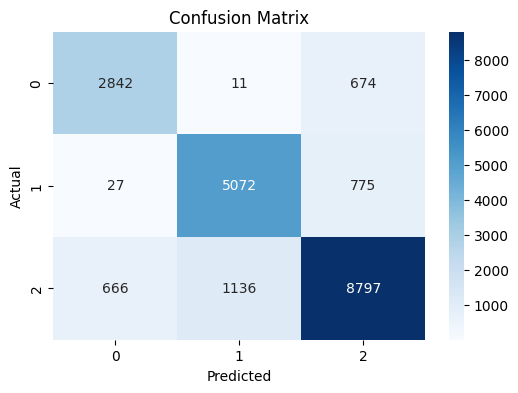

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature Importance

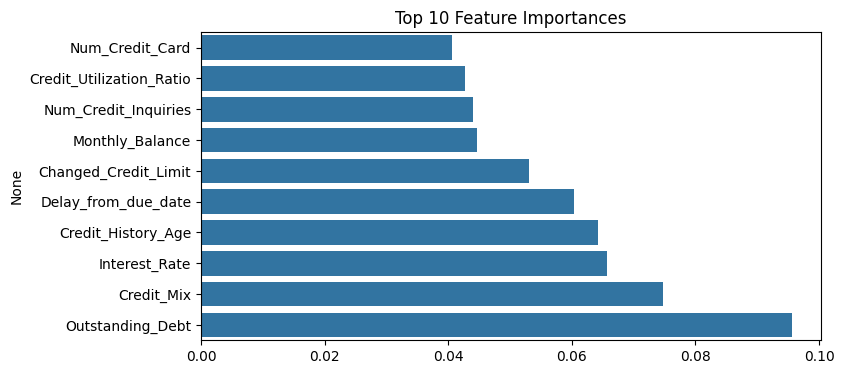

In [27]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(8,4))
plt.title('Top 10 Feature Importances')
sns.barplot(x=importances[indices], y=features[indices], orient='h')
plt.show()

## Save the Trained Model

In [28]:
joblib.dump(model, 'credit_score_model.pkl')

['credit_score_model.pkl']

## Conclusion
- This notebook shows how real customer data can be used to predict credit scores using a Random Forest model.
- We cleaned and analyzed the data, explored key trends, visualized correlations, and built a predictive model.
- The approach is practical and can be used by teams at fintech companies like PaisaBazaar for responsible credit scoring.